## load params and data, create and split Datasets, set checkpoint, init models, set trainer, train, save best model and metric path 

In [ ]:
from Load_Train import run_multiple_models, test_trained_models, plot_all_results
import Models

models = [
    Models.EEGClassifier,
    # Models.MNISTNet,
    # Models.EEGNet,

    # Models.TCNModel_withBase,
    # Models.TCNAttentionModel_withBase,
    # Models.EEGTransformerLite_withBase,
    # Models.ESNet,
    ]

shared_parameters = {

    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    "data_path": "datasets/numpy_testing/ssvep_10_filter_G.npz",
    # "data_path": "datasets/numpy/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_10_nofilter_GCGG.npz",
    # "data_path": "datasets/numpy/ssvep_10_filter_GCGG.npz",
    # "data_path": "processed_eeg_data_eyes.npz",
    "OCCIPITAL_SLICE": slice(0, 8),
    "MAX_TIME": "00:00:02:00",
    "SUMMARY": False,    
    "MODEL_KWARGS": {
        "in_channels": 8,
        # "in_channels": 64,
        # "num_classes": 11,
        "num_classes": 6,
        "LR": 1e-3, # 1e-3
        "WEIGHT_DECAY": 0.0,   
    }
}

# Ideas: big issue might be data, 
# random parameters: weighs in validation, lr, preproc 

results, test_loader = run_multiple_models(models, shared_parameters)
# test_results = test_trained_models(results, test_loader)
# plot_all_results(results, test_results)

/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  _C._set_float32_matmul_precision(precision)


Loading data from: datasets/numpy_testing/ssvep_10_filter_G.npz
Data loaded: X=(957, 8, 500), y=(957,)
Dataset split: Train=669, Val=143, Test=145
Dataloaders ready

Training EEGClassifier...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: |          | 0/? [00:00<?, ?it/s]

/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [7,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [13,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [15,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [19,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:245: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [20,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/ate

Error training EEGClassifier: CUDA error: device-side assert triggered
Search for `cudaErrorAssert' in https://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__TYPES.html for more information.
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


All models processed successfully!



Traceback (most recent call last):
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/call.py", line 49, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 598, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
    ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 1011, in _run
    results = self._run_stage()
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 1055, in _run_stage
    self.fit_loop.run()
    ~~~~~~~~~~~~~~~~~^^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/loops/fit_loop.py", line 216, in run
    self.advance()
    ~~~~~~~~~~~~^^
  File "/home/gtenzing/anacond


Testing EEGClassifier...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 0 accuracy: 0.758
Class 7 accuracy: 0.625
Class 10.5 accuracy: 0.375
Class 12 accuracy: 0.400
Class 15.2 accuracy: 0.200
Class 18.1 accuracy: 0.429


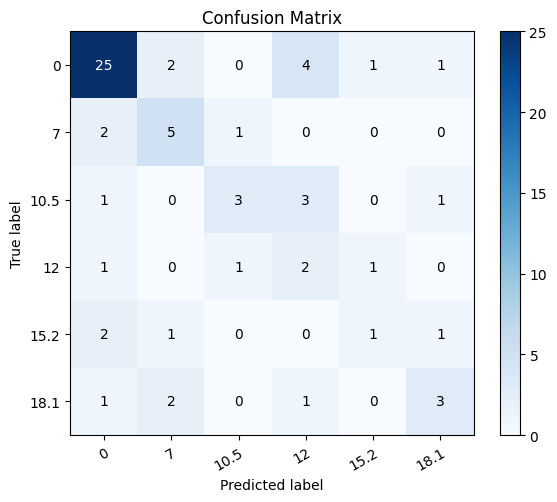

EEGClassifier: Test accuracy = 0.591

Testing complete for all models.



In [2]:
test_results = test_trained_models(results, test_loader)


Plotting EEGClassifier: Test Accuracy = 0.543


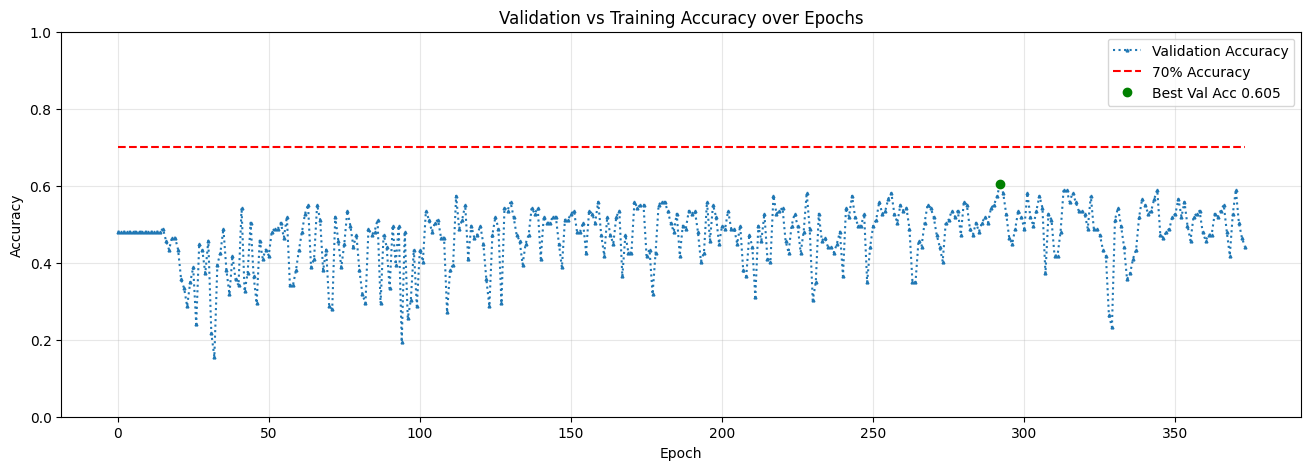

In [3]:
plot_all_results(results, test_results)

## Plot any saved model 

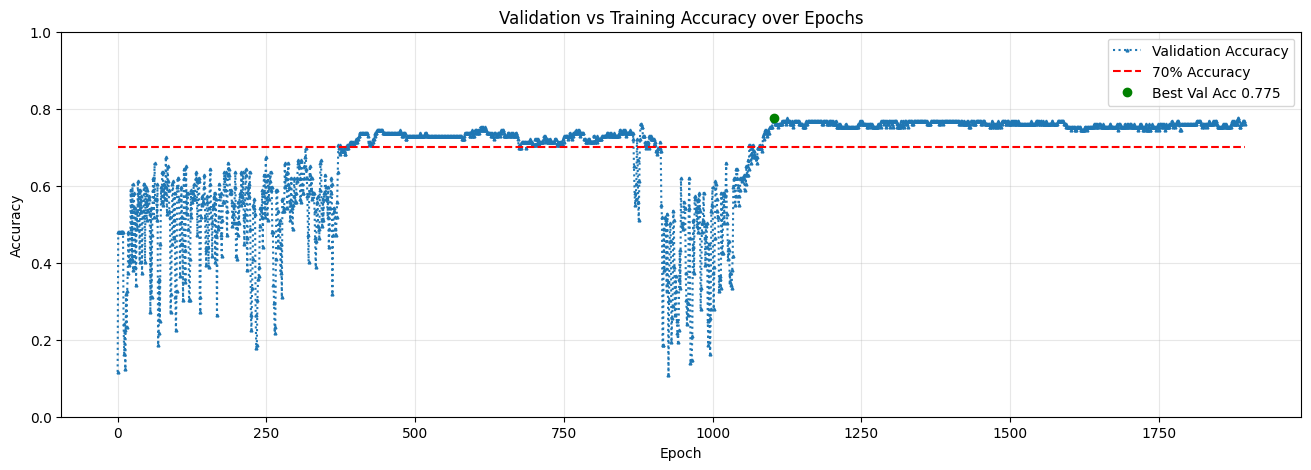

In [2]:
from Utils import plot_training_metrics

csv_path = "logs/EEGClassifier/version__77/metrics.csv"
plot_training_metrics(csv_path)

In [ ]:
from Load_Train import test_trained_models
results = {    
    "model_name": "EEGClassifier",
    "best_model": "logs/EEGClassifier/version__77/checkpoints/best-epoch-1103-val_acc=0.775.ckpt",
    "metrics_path": "logs/EEGClassifier/version__77/metrics.csv",
}
test_results = test_trained_models(results, test_loader)

NameError: name 'test_loader' is not defined